# Welcome to the Minecraft Group Project!

## Run the cell below before continuing with the project

In [1]:
# Load the libraries
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Load the data

In [2]:
# Constants
url_players <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url_sessions <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"

# Reading in the data via URL
mc_sessions <- read_csv(url_sessions)
mc_sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


# Data Wrangling

<ins>To-Do:</ins> (**Tidy Data**)
- [x] Split `start_time` and `end_time` with Dates and Time separately
- [x] Convert each Data into Day of the Week (with type `date`)
- [x] Then use `weekday()` function to convert it

[Code Date Citation #1](https://stackoverflow.com/questions/59998445/how-to-create-a-column-in-a-data-frame-that-shows-the-days-of-the-week-from-exis) \
[Code Date Citation #2](https://www.geeksforgeeks.org/convert-date-to-day-of-week-in-r/)

start_date,start_time,end_date,end_time,start_day,end_day
<date>,<chr>,<date>,<chr>,<ord>,<ord>
30-06-20,18:12,30-06-20,18:24,Thursday,Thursday
17-06-20,23:33,17-06-20,23:46,Tuesday,Tuesday
25-07-20,17:34,25-07-20,17:57,Sunday,Sunday
25-07-20,03:22,25-07-20,03:58,Sunday,Sunday
25-05-20,16:01,25-05-20,16:12,Tuesday,Tuesday
23-06-20,15:08,23-06-20,17:10,Tuesday,Tuesday
15-04-20,07:12,15-04-20,07:21,Monday,Monday
21-09-20,02:13,21-09-20,02:30,Monday,Monday
21-06-20,02:31,21-06-20,02:49,Sunday,Sunday


start_date,start_time,end_date,end_time,start_day,end_day,playtime
<date>,<dttm>,<date>,<dttm>,<ord>,<ord>,<drtn>
30-06-20,2024-11-05 18:12:00,30-06-20,2024-11-05 18:24:00,Thursday,Thursday,12 mins
17-06-20,2024-11-05 23:33:00,17-06-20,2024-11-05 23:46:00,Tuesday,Tuesday,13 mins
25-07-20,2024-11-05 17:34:00,25-07-20,2024-11-05 17:57:00,Sunday,Sunday,23 mins
25-07-20,2024-11-05 03:22:00,25-07-20,2024-11-05 03:58:00,Sunday,Sunday,36 mins
25-05-20,2024-11-05 16:01:00,25-05-20,2024-11-05 16:12:00,Tuesday,Tuesday,11 mins
23-06-20,2024-11-05 15:08:00,23-06-20,2024-11-05 17:10:00,Tuesday,Tuesday,122 mins
15-04-20,2024-11-05 07:12:00,15-04-20,2024-11-05 07:21:00,Monday,Monday,9 mins
21-09-20,2024-11-05 02:13:00,21-09-20,2024-11-05 02:30:00,Monday,Monday,17 mins
21-06-20,2024-11-05 02:31:00,21-06-20,2024-11-05 02:49:00,Sunday,Sunday,18 mins


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


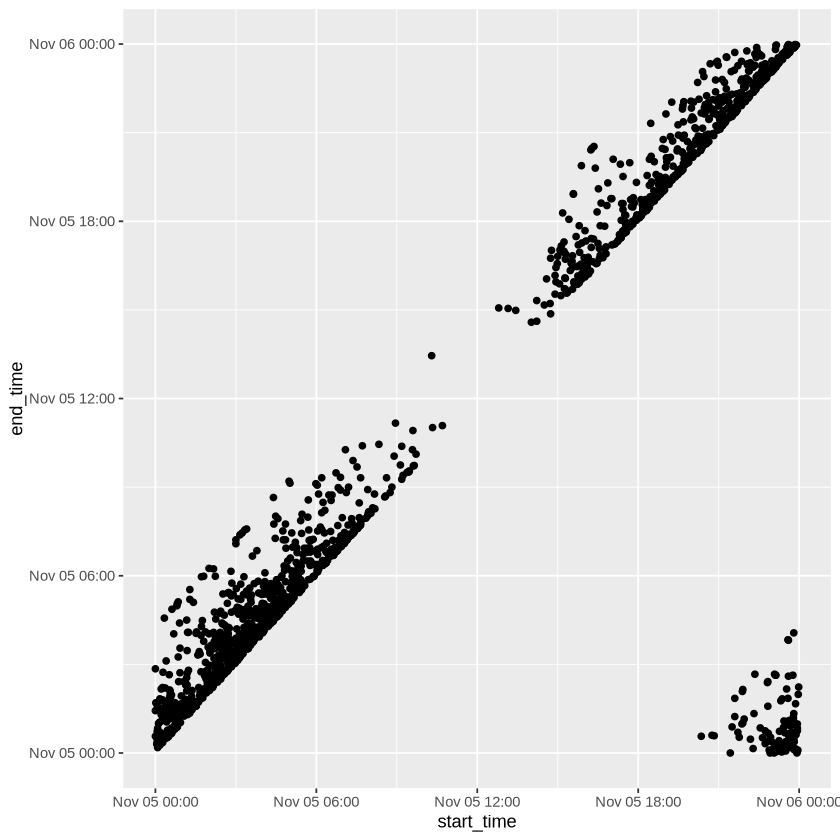

In [17]:
# Removing unnecessary columns
mc_cleaned <- mc_sessions |>
    select(start_time, end_time)

# Splitting the columns into Date and Time
mc_split <- mc_cleaned |>
    separate(col = start_time,
            into = c("start_date", "start_time"),
            sep = " ") |>
    separate(col = end_time,
             into = c("end_date", "end_time"),
             sep = " ") |>
    mutate(start_date = as.Date(start_date),
           end_date = as.Date(end_date))

# Convert each date into Day of the Week
# abr = TRUE (would turn it into Thur.)
# ord = ordered factor
mc_final <- mc_split |>
    mutate(start_day = wday(start_date, label = TRUE, abbr = FALSE),
           end_day = wday(end_date, label = TRUE, abbr = FALSE))
mc_final

# Converting start_time and end_time to dttm
# Adding playtime 
mc_final_time <- mc_final |>
    mutate(start_time = as.POSIXct(start_time, tryFormats = c("%H:%M"))) |>
    mutate(end_time = as.POSIXct(end_time, tryFormats = c("%H:%M"))) |>
    mutate(playtime = difftime(end_time, start_time, units = "mins"))
mc_final_time

# Plotting end_time vs. start_time
mc_final_plot <- ggplot(mc_final_time, aes(x = start_time, y = end_time)) +
    geom_point()
mc_final_plot

<ins>To Do</ins> (**Do Calculations**)
- [ ] Convert start_time and end_time from dttm to dbl (minutes from midnight)